Gemini generated In depth summary 
Based on the video chapters and your code, here is a step-by-step guide to implementing the multi-layer perceptron (MLP) language model.

***

### Part 1: Dataset and Model Architecture

1.  **Create the Dataset**:
    * Load the `names.txt` file and define your character vocabulary (`stoi`, `itos`).
    * Choose a `block_size` (context length), which is the number of previous characters used to predict the next one.
    * Iterate through each word and create a list of contexts (`X`) and their corresponding next characters (`Y`). The `.` token is used to pad the context at the beginning and signal the end of a word.
    * Shuffle the words and split the dataset into **training (80%)**, **validation (10%)**, and **test (10%)** sets. Use `Xtr, Ytr`, `Xdev, Ydev`, and `Xte, Yte` to store these.
2.  **Initialize the Neural Network**:
    * **Embedding Layer**: Create an embedding lookup table `C` as a `27x10` tensor. Each row represents a character, and the 10 values are its **embedding**. This is a trainable parameter.
    * **Hidden Layer**: Define the weights `W1` (a `30x200` tensor, `30` because `block_size * embedding_size = 3 * 10`) and biases `b1` (`200` elements).
    * **Output Layer**: Define the weights `W2` (`200x27`) and biases `b2` (`27` elements). The output size matches the number of characters.
    * Put all these tensors (`C, W1, b1, W2, b2`) into a list called `parameters` and set `requires_grad=True` for all of them. 

***

### Part 2: Training and Evaluation

1.  **Set Up the Training Loop**:
    * Loop for a specified number of iterations (e.g., 200,000).
    * For each iteration, construct a **minibatch** by randomly selecting a small number of indices (`ix`) from your training data `Xtr` and `Ytr`.
2.  **Forward Pass**:
    * Perform an **embedding lookup**: Use `Xtr[ix]` to get the embeddings from `C`, resulting in a tensor of shape `(batch_size, block_size, embedding_size)`.
    * Reshape the embeddings into a single vector per example using `.view(-1, block_size * embedding_size)`.
    * Pass this through the hidden layer: compute `emb.view(...) @ W1 + b1` and apply the **tanh activation function**.
    * Pass the hidden layer output through the output layer: compute `h @ W2 + b2`. This gives you the `logits`.
    * Calculate the **loss** using PyTorch's `F.cross_entropy`, passing in the `logits` and the labels `Ytr[ix]`. This function efficiently combines `softmax`, `log`, and `mean`.
3.  **Backward Pass and Update**:
    * Zero out the gradients for all parameters by setting `p.grad = None` for each parameter `p`.
    * Call `loss.backward()` to compute the gradients.
    * Update the parameters using a learning rate: `p.data += -lr * p.grad`. Use a decaying learning rate, such as starting with `0.1` and dropping to `0.01` after a certain number of steps.
4.  **Evaluate and Visualize**:
    * After training, evaluate the loss on the validation set (`Xdev, Ydev`) to check for **overfitting**.
    * Visualize the embedding space by plotting the first two dimensions of the `C` matrix. Each point represents a character.

***

### Part 3: Sampling and Conclusion

1.  **Sample from the Model**:
    * Start with an initial `context` of all `.` tokens.
    * Enter a loop that continues until the model predicts a `.` token.
    * Inside the loop, get the embeddings for the current `context` from the trained `C` matrix.
    * Perform a forward pass through the hidden and output layers to get the `logits`.
    * Apply `F.softmax` to the logits to get probabilities.
    * Use `torch.multinomial` to sample the index of the next character.
    * Append the new index to your output list and update the `context` by sliding the window.
    * Finally, join the characters from the output list to form a new name.

    ---
    ---

GPT summary walkthrough , with lesser help , covering all ideas in the code 
---
# 🧠 Character-Level MLP Language Model — Complete From-Scratch Walkthrough

This document summarizes the **entire lecture** so you can reimplement the model without looking at the original code.  
It covers **every step**: data prep, architecture, training, and sampling.

---

## 1️⃣ Problem Setup

We want to train a **character-level language model** that generates new names.  
The model will be an **MLP** (multi-layer perceptron) trained from scratch on a dataset of names.

The model’s job:  
Given a **context** (a fixed number of previous characters), predict the **next character**.

---

## 2️⃣ Data Preparation

1. **Load Dataset**  
   - Read the `names.txt` file into a list of strings, one name per line.  
   - Inspect dataset: size, min/max length.

2. **Define Vocabulary**  
   - Collect all unique characters in the dataset.  
   - Add a special `.` token for start/end of a word.  
   - Create two dictionaries:
     - `stoi`: char → index
     - `itos`: index → char

3. **Context Windows**  
   - Choose a fixed context size `block_size` (e.g., 3).  
   - For each name:
     - Pad with `.` tokens at the start.
     - Slide a window of length `block_size` across the name.
     - The window characters are the **input**.
     - The next character is the **target**.

4. **Numerical Encoding**  
   - Map characters in the context and the target to integers using `stoi`.  
   - Store all contexts in an integer tensor `X`.  
   - Store all targets in integer tensor `Y`.

---

## 3️⃣ Model Architecture

The MLP has three main parts:

1. **Embedding Layer**  
   - A learnable matrix `C` of size `(vocab_size, embedding_dim)`.  
   - Converts each character index into a dense vector.

2. **Hidden Layer**  
   - Flatten all embeddings for the context into a single vector.  
   - Apply a linear transformation: `h = tanh(X @ W1 + b1)`  
     - `W1`: weight matrix of shape `(context_size * embedding_dim, hidden_size)`
     - `b1`: bias vector of length `hidden_size`.

3. **Output Layer**  
   - Map hidden activations to vocabulary logits: `logits = h @ W2 + b2`  
     - `W2`: weight matrix `(hidden_size, vocab_size)`
     - `b2`: bias vector `(vocab_size,)`

---

## 4️⃣ Loss Function

We use **cross-entropy loss** between predicted logits and target indices.

Two ways to compute:
1. **Manual**: softmax → log → negative log likelihood → mean over batch.
2. **Built-in**: `torch.nn.functional.cross_entropy(logits, targets)`.

---

## 5️⃣ Training Loop

1. **Initialization**  
   - Randomly initialize all weights with small values (e.g., normal distribution).  
   - Zero biases.

2. **Forward Pass**  
   - Embed context characters → concatenate → hidden layer → output layer.  
   - Compute loss vs targets.

3. **Backward Pass**  
   - Call `.backward()` on loss to compute gradients.

4. **Parameter Update**  
   - Update all parameters with gradient descent:  
     `param -= learning_rate * param.grad`  
   - Zero gradients after each update.

5. **Minibatch Training**  
   - Shuffle dataset each epoch.  
   - Train in batches for efficiency.

6. **Learning Rate Tuning**  
   - Try a small range of learning rates.  
   - Pick one that leads to fastest stable loss decrease.

---

## 6️⃣ Train/Validation/Test Split

- Split dataset: 80% train, 10% val, 10% test.  
- Train only on training set, tune hyperparameters on val set, report final test loss.

---

## 7️⃣ Experiments & Insights

- **Bigger Hidden Layer**: more capacity, better fit.  
- **Bigger Embedding Dim**: richer character representations.  
- **Regularization**: optional L2 penalty to reduce overfitting.

---

## 8️⃣ Sampling from the Model

To generate a name:
1. Start with `.` tokens as context.
2. Predict probability distribution over next char.
3. Sample a char from distribution.
4. Shift context, append new char.
5. Repeat until `.` is generated (end of name).

---

## 9️⃣ Visualizing Embeddings

- After training, the embedding matrix `C` contains a vector for each character.  
- You can plot them in 2D (e.g., PCA or t-SNE) to see relationships between characters.

---

## 🔟 Full Process Recap

1. Load data & build vocab.  
2. Create context–target pairs.  
3. Encode to integers.  
4. Build embedding + MLP layers.  
5. Train with cross-entropy loss.  
6. Tune hyperparameters.  
7. Generate samples.  
8. Visualize learned embeddings.

---

**End Goal**: A fully trained MLP that can generate realistic-looking new names purely from character-level probabilities learned on the training set.

---

In [1]:
# let's code 
print("Hello")

Hello


Video Transcript - summary 
# Multi-Layer Perceptron Language Model Implementation Summary

## Introduction and Problem Statement

This lecture continues implementing "makemore" by transitioning from bigram language models to multi-layer perceptrons (MLPs). The previous bigram model used single character context to predict the next character through count-based probability tables, where each row summed to one.

**Core Problem with Bigram Models:**
- Limited to single character context produces poor, non-name-like predictions
- Scaling to more context creates exponential growth in table size:
  - 1 character context: 27 possibilities
  - 2 character context: 27 × 27 = 729 possibilities  
  - 3 character context: ~20,000 possibilities
- Results in sparse counts and system breakdown

## Theoretical Foundation: Bengio et al. 2003

The implementation follows the influential Bengio et al. 2003 paper on neural language models.

**Paper's Approach:**
- 17,000 word vocabulary embedded in 30-dimensional feature vectors
- Words initially positioned randomly in embedding space
- Through backpropagation, semantically similar words cluster together
- Identical modeling approach: maximize log likelihood of training data

**Key Insight - Generalization Through Embeddings:**
Example: "A dog was running in a ___"
- Even if exact phrase never seen in training, model can generalize
- If seen "The dog was running in a ___", embeddings for "a" and "the" learn similarity
- Knowledge transfers through embedding space to novel scenarios
- Similar concept applies to "cats" and "dogs" as animals

**Neural Network Architecture:**
- Input: 3 previous words (indices 0-16999)
- Embedding lookup table C: 17,000 × 30 matrix
- Each word index retrieves corresponding 30-dimensional embedding
- Input layer: 90 neurons (3 words × 30 dimensions)
- Hidden layer: Hyperparameter size (e.g., 100 neurons), fully connected
- Tanh nonlinearity
- Output layer: 17,000 neurons (one per possible next word), fully connected
- Softmax normalization for probability distribution

**Training Process:**
- Parameters include embedding table C, hidden layer weights/biases, output layer weights/biases
- All optimized via backpropagation
- Most computation in expensive output layer due to vocabulary size

## Implementation Details

### Dataset Preparation
```python
block_size = 3  # Context length (3 characters predict 4th)
```

**Dataset Creation Process:**
- Build examples from character sequences with padding dots
- For word "emma": context [...] → e, [..e] → m, [.em] → m, [emm] → a, [mma] → .
- Generate X (contexts) and Y (target characters) arrays
- 32,000 names total, initially testing on first 5 words (32 examples)

### Embedding Implementation

**Embedding Lookup Table:**
- 27 possible characters embedded in lower-dimensional space
- Start with 2D embeddings for visualization: 27 × 2 matrix C
- Random initialization

**Indexing Methods:**
1. Direct indexing: `C[5]` retrieves 5th row
2. One-hot equivalent: `F.one_hot(torch.tensor(5), 27).float() @ C`
   - Demonstrates embedding as first neural network layer
   - Direct indexing preferred for efficiency

**Batch Processing:**
- PyTorch supports flexible indexing with lists, tensors, multi-dimensional arrays
- `C[X]` embeds entire batch simultaneously
- Output shape: 32 × 3 × 2 (batch_size × context_length × embedding_dim)

### Neural Network Layers

**Hidden Layer Construction:**
- Input: Concatenated embeddings (3 × 2 = 6 dimensions)
- Two concatenation approaches:
  1. `torch.cat([emb[:, 0], emb[:, 1], emb[:, 2]], dim=1)` - creates new tensor
  2. `emb.view(32, 6)` - efficient view manipulation (preferred)

**View Operation Efficiency:**
- PyTorch tensors have underlying 1D storage
- `view()` manipulates tensor metadata (strides, shapes) without copying data
- Extremely efficient compared to concatenation which creates new memory

**Hidden Layer Forward Pass:**
```python
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
```
- W1: 6 × 100 weight matrix
- b1: 100-dimensional bias vector
- Broadcasting ensures bias added to each example

**Output Layer:**
```python
logits = h @ W2 + b2
```
- W2: 100 × 27 weight matrix  
- b2: 27-dimensional bias vector
- Output: 32 × 27 logits

### Loss Calculation

**Manual Implementation:**
```python
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
```

**PyTorch Built-in (Preferred):**
```python
loss = F.cross_entropy(logits, Y)
```

**Advantages of F.cross_entropy:**
1. **Efficiency**: Fused kernels, no intermediate tensors
2. **Numerical stability**: Handles extreme logit values via offset subtraction
3. **Simpler backward pass**: Analytically derived derivatives

**Numerical Stability Example:**
- Large positive logits (e.g., 100) cause overflow in exp()
- F.cross_entropy subtracts maximum logit value internally
- Exploits property: softmax(x) = softmax(x + c) for any constant c

### Training Implementation

**Basic Training Loop:**
```python
for _ in range(1000):
    # Zero gradients
    for p in parameters:
        p.grad = None
    
    # Forward pass
    loss = F.cross_entropy(logits, Y)
    
    # Backward pass
    loss.backward()
    
    # Parameter update
    for p in parameters:
        p.data += -learning_rate * p.grad
```

**Overfitting Demonstration:**
- 3,400 parameters vs 32 examples → easy overfitting
- Achieves very low loss but not exactly zero
- Limitation: same input contexts can have different valid outputs

### Mini-batch Training

**Problem**: Full dataset (228,000 examples) too slow per iteration

**Solution**: Mini-batch gradient descent
```python
ix = torch.randint(0, X.shape[0], (32,))  # Random batch indices
loss = F.cross_entropy(logits[ix], Y[ix])
```

**Benefits:**
- Much faster iterations
- Approximate gradients sufficient for progress
- Better to take many approximate steps than few exact steps

### Learning Rate Selection

**Learning Rate Range Finding:**
1. Test very low rates (e.g., 0.001) → minimal progress
2. Test very high rates (e.g., 0.1, 1.0) → instability/explosion
3. Use exponential spacing: `torch.linspace(-3, 0, 1000)` → `10**lre`
4. Plot learning rate vs loss to find optimal range
5. Choose rate from "valley" region of plot

**Typical Process:**
- Start with found learning rate
- Train until plateau
- Apply learning rate decay (10x reduction)
- Continue training

### Train/Validation/Test Splits

**Problem**: Training loss alone insufficient for model evaluation
- Models can memorize training data (overfitting)
- Need generalization assessment

**Standard Split:**
- **Training (80%)**: Parameter optimization via gradient descent  
- **Validation/Dev (10%)**: Hyperparameter tuning
- **Test (10%)**: Final performance evaluation (use sparingly)

**Implementation:**
```python
n1 = int(0.8 * len(words))  # 80% train
n2 = int(0.9 * len(words))  # 90% train+dev
X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])  
X_test, Y_test = build_dataset(words[n2:])
```

### Model Scaling and Optimization

**Underfitting Diagnosis:**
- Training loss ≈ Validation loss indicates underfitting
- Solution: Increase model capacity

**Scaling Experiments:**
1. **Hidden layer size**: 100 → 300 neurons
2. **Embedding dimension**: 2 → 10 dimensions
3. **Context length**: 3 → larger block_size

**Embedding Visualization (2D case):**
- Plot character embeddings after training
- Reveals learned structure: vowels cluster together
- Special characters (q, .) positioned as outliers
- Demonstrates meaningful learned representations

**Final Architecture:**
- 10-dimensional character embeddings
- 200 hidden neurons  
- Input: 30 dimensions (3 characters × 10D embeddings)
- ~11,000 total parameters

**Training Schedule:**
- 100k steps at learning_rate=0.1
- 100k steps at learning_rate=0.01 (decay)
- Achieved ~2.17 validation loss (surpassing 2.45 bigram baseline)

### Sampling from Trained Model

**Generation Process:**
```python
context = [0, 0, 0]  # Start with dots
for _ in range(20):
    emb = C[context]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, 1).item()
    context = context[1:] + [ix]  # Shift context window
    if ix == 0: break  # Stop at end token
```

**Results:**
- Generated names significantly more name-like than bigram model
- Examples: "ham", "joes" - showing improved quality
- Still room for improvement with further optimization

### Optimization Challenges and Improvements

**Available Tuning Parameters:**
1. Hidden layer neuron count
2. Embedding dimensionality  
3. Context length (block_size)
4. Learning rate schedule
5. Batch size
6. Training duration
7. Regularization techniques

**Best Practices:**
- Systematic hyperparameter search rather than random tuning
- Monitor both training and validation performance
- Use learning rate scheduling
- Implement proper gradient tracking and visualization

**Final Performance:**
- Validation loss: 2.17 
- Significant improvement over bigram baseline (2.45)
- Demonstrates effectiveness of neural approach with learned embeddings

This implementation successfully demonstrates the transition from simple statistical models to neural networks, showing how embeddings enable better generalization and the importance of proper training methodology including data splitting and hyperparameter optimization.

In [2]:
# plan of action
# words ,  split into block-sized-context and outputs 
# split into train , dev , testing data
# emdedding vector -> vocab     X embed_dimensions 
# context_size*embed_dimensions X num_neurons_lay_1
# 2nd layer: num_neurons_lay_1  X num_poss_outputs

import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
# start
words = open("names.txt" , "r").read().splitlines()

chars = set(''.join(words))
chars.add('.')

# itos , stoi

stoi , itos = {} , {}
sorted_chars = sorted(chars)
for index , char in enumerate(sorted_chars):
    stoi[char] =  index
    itos[index] =  char

print("stoi : " , stoi)
print("itos : " , itos)
print()

stoi :  {'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos :  {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}



In [4]:
# create the dataset

block_size = 3

random.seed(42)
random.shuffle(words)

xs , ys = [] , []
for word in words[:100]:
    # print(word)
    word = '.' + word + '.'
    context = ['.']*block_size
    for i in range(len(word)-1):
        context = context[1:] + [word[i]]
        # print(context)
        xs.append("".join(context))
        ys.append(word[i+1])

# for i in range(len(xs)):
#     print(xs[i] , ys[i])
# xs = torch.tensor(xs)
# ys = torch.tensor(ys)
for i in range(len(xs)):
    print(xs[i] , ys[i])

... y
..y u
.yu h
yuh e
uhe n
hen g
eng .
... d
..d i
.di o
dio n
ion d
ond r
ndr e
dre .
... x
..x a
.xa v
xav i
avi e
vie n
ien .
... j
..j o
.jo r
jor i
ori .
... j
..j u
.ju a
jua n
uan l
anl u
nlu i
lui s
uis .
... e
..e r
.er a
era n
ran d
and i
ndi .
... p
..p h
.ph i
phi a
hia .
... s
..s a
.sa m
sam a
ama t
mat h
ath a
tha .
... p
..p h
.ph o
pho e
hoe n
oen i
eni x
nix .
... e
..e m
.em m
emm e
mme l
mel y
ely n
lyn n
ynn .
... h
..h o
.ho l
hol l
oll a
lla n
lan .
... h
..h o
.ho l
hol l
oll i
lli s
lis .
... c
..c a
.ca l
cal l
all a
lla l
lal i
ali l
lil y
ily .
... a
..a d
.ad e
ade l
del a
ela y
lay d
ayd e
yde .
... j
..j o
.jo s
jos e
ose p
sep h
eph y
phy n
hyn e
yne .
... w
..w e
.we l
wel d
eld o
ldo n
don .
... k
..k a
.ka y
kay l
ayl e
yle .
... r
..r a
.ra g
rag n
agn a
gna r
nar .
... c
..c o
.co l
col b
olb i
lbi e
bie .
... t
..t a
.ta v
tav e
ave o
veo n
eon .
... a
..a k
.ak i
aki .
... p
..p e
.pe y
pey t
eyt e
yte n
ten .
... k
..k e
.ke v
kev a
eva r
var 

In [5]:
# spitting the data

n1 = int(0.8*len(xs))
n2 = int(0.9*len(xs))

print(n1,n2)

Xtr = xs[:n1]
Ytr = ys[:n1]

Xdev = xs[n1+1:n2]
Ydev = ys[n1+1:n2]

Xtst = xs[n2+1:]
Ytst = ys[n2+1:]

print(Xtr,Ytr,Xdev,Ydev,Xtst,Ytst)

595 669
['...', '..y', '.yu', 'yuh', 'uhe', 'hen', 'eng', '...', '..d', '.di', 'dio', 'ion', 'ond', 'ndr', 'dre', '...', '..x', '.xa', 'xav', 'avi', 'vie', 'ien', '...', '..j', '.jo', 'jor', 'ori', '...', '..j', '.ju', 'jua', 'uan', 'anl', 'nlu', 'lui', 'uis', '...', '..e', '.er', 'era', 'ran', 'and', 'ndi', '...', '..p', '.ph', 'phi', 'hia', '...', '..s', '.sa', 'sam', 'ama', 'mat', 'ath', 'tha', '...', '..p', '.ph', 'pho', 'hoe', 'oen', 'eni', 'nix', '...', '..e', '.em', 'emm', 'mme', 'mel', 'ely', 'lyn', 'ynn', '...', '..h', '.ho', 'hol', 'oll', 'lla', 'lan', '...', '..h', '.ho', 'hol', 'oll', 'lli', 'lis', '...', '..c', '.ca', 'cal', 'all', 'lla', 'lal', 'ali', 'lil', 'ily', '...', '..a', '.ad', 'ade', 'del', 'ela', 'lay', 'ayd', 'yde', '...', '..j', '.jo', 'jos', 'ose', 'sep', 'eph', 'phy', 'hyn', 'yne', '...', '..w', '.we', 'wel', 'eld', 'ldo', 'don', '...', '..k', '.ka', 'kay', 'ayl', 'yle', '...', '..r', '.ra', 'rag', 'agn', 'gna', 'nar', '...', '..c', '.co', 'col', 'olb', 'lbi

In [6]:
# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.001 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2
print(C)

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]

Mini batch size :  0
tensor([[0.6856, 0.0114],
        [0.7402, 0.0363],
        [0.8819, 0.0425],
        [0.9433, 0.8630],
        [0.7422, 0.1298],
        [0.6088, 0.3692],
        [0.5116, 0.2341],
        [0.2454, 0.5123],
        [0.9040, 0.3495],
        [0.8431, 0.2337],
        [0.1011, 0.3419],
        [0.2789, 0.5695],
        [0.2641, 0.8558],
        [0.1298, 0.2401],
        [0.9122, 0.7090],
        [0.1806, 0.1759],
        [0.2430, 0.8846],
        [0.8845, 0.3351],
        [0.5884, 0.8332],
        [0.9479, 0.7864],
        [0.5057, 0.1851],
        [0.8593, 0.9850],
        [0.0693, 0.7938],
        [0.5298, 0.2598],
        [0.5644, 0.6012],
        [0.8435, 0.8888],
        [0.6606, 0.3906]], requires_grad=True)


In [7]:
print(params)

[tensor([[0.6856, 0.0114],
        [0.7402, 0.0363],
        [0.8819, 0.0425],
        [0.9433, 0.8630],
        [0.7422, 0.1298],
        [0.6088, 0.3692],
        [0.5116, 0.2341],
        [0.2454, 0.5123],
        [0.9040, 0.3495],
        [0.8431, 0.2337],
        [0.1011, 0.3419],
        [0.2789, 0.5695],
        [0.2641, 0.8558],
        [0.1298, 0.2401],
        [0.9122, 0.7090],
        [0.1806, 0.1759],
        [0.2430, 0.8846],
        [0.8845, 0.3351],
        [0.5884, 0.8332],
        [0.9479, 0.7864],
        [0.5057, 0.1851],
        [0.8593, 0.9850],
        [0.0693, 0.7938],
        [0.5298, 0.2598],
        [0.5644, 0.6012],
        [0.8435, 0.8888],
        [0.6606, 0.3906]], requires_grad=True), tensor([[0.2877, 0.0909, 0.3207, 0.6723, 0.1006, 0.2635, 0.6446, 0.7315, 0.9054,
         0.4232, 0.4236, 0.2706, 0.1901, 0.5009, 0.9115, 0.1473, 0.0486, 0.9921,
         0.7246, 0.0433, 0.4788, 0.2761, 0.4413, 0.4827, 0.2420, 0.1625, 0.8155,
         0.2294, 0.0134, 0.6089,

In [8]:
# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]
emb = C[X]

emb

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
emb.shape

torch.Size([182, 3, 2])

In [ ]:
hidden = torch.tanh(emb.view( batch_size , block_size * emb_size) @ W1 + b1)

In [ ]:
hidden.shape

torch.Size([182, 100])

In [ ]:
logits = (hidden @ W2 + b2)
logits

tensor([[44.8095, 48.2617, 39.9420,  ..., 41.1934, 49.2096, 45.2271],
        [46.7581, 50.2267, 41.7099,  ..., 43.2900, 51.2857, 47.1326],
        [44.5744, 47.8927, 39.6194,  ..., 41.0400, 48.7794, 44.8521],
        ...,
        [43.8106, 47.1896, 39.0796,  ..., 40.4553, 48.2304, 44.3814],
        [46.6806, 50.1619, 41.6366,  ..., 43.2414, 51.2043, 47.0809],
        [44.9423, 48.3940, 40.0832,  ..., 41.4891, 49.3296, 45.4873]],
       grad_fn=<AddBackward0>)

In [ ]:
logits.shape

torch.Size([182, 27])

In [ ]:
counts = logits.exp()
counts

tensor([[2.8876e+19, 9.1160e+20, 2.2212e+17,  ..., 7.7636e+17, 2.3520e+21,
         4.3839e+19],
        [2.0267e+20, 6.5042e+21, 1.3014e+18,  ..., 6.3183e+18, 1.8754e+22,
         2.9473e+20],
        [2.2825e+19, 6.3029e+20, 1.6087e+17,  ..., 6.6598e+17, 1.5297e+21,
         3.0130e+19],
        ...,
        [1.0634e+19, 3.1201e+20, 9.3766e+16,  ..., 3.7113e+17, 8.8346e+20,
         1.8820e+19],
        [1.8756e+20, 6.0957e+21, 1.2094e+18,  ..., 6.0186e+18, 1.7288e+22,
         2.7988e+20],
        [3.2977e+19, 1.0405e+21, 2.5581e+17,  ..., 1.0435e+18, 2.6519e+21,
         5.6870e+19]], grad_fn=<ExpBackward0>)

In [ ]:
probs = counts / counts.sum(1 , keepdim=True)
print(probs)

loss = - probs[torch.arange(batch_size) , Y].log().mean()
loss

tensor([[4.0641e-04, 1.2830e-02, 3.1262e-06,  ..., 1.0927e-05, 3.3103e-02,
         6.1700e-04],
        [3.6510e-04, 1.1717e-02, 2.3444e-06,  ..., 1.1382e-05, 3.3785e-02,
         5.3095e-04],
        [5.5504e-04, 1.5327e-02, 3.9120e-06,  ..., 1.6195e-05, 3.7198e-02,
         7.3270e-04],
        ...,
        [4.0708e-04, 1.1944e-02, 3.5894e-06,  ..., 1.4207e-05, 3.3820e-02,
         7.2043e-04],
        [3.6734e-04, 1.1939e-02, 2.3686e-06,  ..., 1.1788e-05, 3.3859e-02,
         5.4816e-04],
        [3.9202e-04, 1.2369e-02, 3.0410e-06,  ..., 1.2404e-05, 3.1525e-02,
         6.7605e-04]], grad_fn=<DivBackward0>)


tensor(5.7239, grad_fn=<NegBackward0>)

In [ ]:
# this manual way of calculating is annoying , makes for worse backprop and creates issues like storing inf and nan
# instead , we use the inbuild softmax function that allows for better backprop using analytically derived derivatives , and 
# it first subtracts the largest value from each row before raises exp hence no inf and nan


In [ ]:
loss = F.cross_entropy(logits , Y)
loss

tensor(5.7239, grad_fn=<NllLossBackward0>)

In [ ]:
print("Number of parameters are " , sum (p.nelement() for p in params))

Number of parameters are  3481


In [ ]:
# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.0004 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


Mini batch size :  73
Number of parameters are  3481


In [ ]:
# number of iterations
num_itr = 10000

# learning rate
lr = 0.1

for i in range(num_itr):
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i < 500 and i%10 ==0) or (i%100==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lr
    


Iteration 0 : loss = 9.373917579650879
Iteration 10 : loss = 2.924607038497925
Iteration 20 : loss = 2.8582231998443604
Iteration 30 : loss = 2.8392229080200195
Iteration 40 : loss = 2.8302903175354004
Iteration 50 : loss = 2.8256754875183105
Iteration 60 : loss = 2.8222668170928955
Iteration 70 : loss = 2.819258213043213
Iteration 80 : loss = 2.8164031505584717
Iteration 90 : loss = 2.8135671615600586
Iteration 100 : loss = 2.8106565475463867
Iteration 110 : loss = 2.8075947761535645
Iteration 120 : loss = 2.8043134212493896
Iteration 130 : loss = 2.800737142562866
Iteration 140 : loss = 2.7967922687530518
Iteration 150 : loss = 2.792391538619995
Iteration 160 : loss = 2.7874338626861572
Iteration 170 : loss = 2.781806468963623
Iteration 180 : loss = 2.7753875255584717
Iteration 190 : loss = 2.7680418491363525
Iteration 200 : loss = 2.759645700454712
Iteration 210 : loss = 2.750096082687378
Iteration 220 : loss = 2.739339828491211
Iteration 230 : loss = 2.7273952960968018
Iteration 24

In [ ]:
# we achieve a super low loss here coz we are overfitting this batch pf 182 samples - and 3480 params !!
# and ya we cannot make loss zero , coz for most inputs , there are multple poss outputs so that wont ever happen
# ... is supposed to predict a , o , e , etc (depeinid on all the starting letters of diferent names) 
# hence the prob for those will always be less than 1 , and so on

# so for a more general loss , we use the whole data set , and take random minibatches of it in each iteration ,
# making the learning faster , 


In [ ]:
# number of iterations
num_itr = 5000

# learning rate
lr = 0.1

for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i < 500 and i%10 ==0) or (i%60==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lr

Iteration 0 : loss = 10.331025123596191
Iteration 10 : loss = 8.360413551330566
Iteration 20 : loss = 7.017969608306885
Iteration 30 : loss = 5.076692581176758
Iteration 40 : loss = 4.456148147583008
Iteration 50 : loss = 4.460413455963135
Iteration 60 : loss = 4.356618881225586
Iteration 70 : loss = 3.916355609893799
Iteration 80 : loss = 3.494235038757324
Iteration 90 : loss = 3.4267807006835938
Iteration 100 : loss = 3.661517858505249
Iteration 110 : loss = 3.4106671810150146
Iteration 120 : loss = 3.111236572265625
Iteration 130 : loss = 2.9684159755706787
Iteration 140 : loss = 2.8471484184265137
Iteration 150 : loss = 3.0878546237945557
Iteration 160 : loss = 2.8277485370635986
Iteration 170 : loss = 3.2165262699127197
Iteration 180 : loss = 3.3762621879577637
Iteration 190 : loss = 2.9490301609039307
Iteration 200 : loss = 2.9708616733551025
Iteration 210 : loss = 3.016784191131592
Iteration 220 : loss = 2.6250052452087402
Iteration 230 : loss = 2.8556182384490967
Iteration 240 

In [ ]:
# now we get a way more accurate loss , but still , it isnt good enough and also we see that after 140 ish iterations
# the loss becomes wavy and doesnt decline in the steady way we would want it to ...
# this is because of the random choice of learning rate

# SO LETS try to find a good learning rate... and the arrays of possible learning rates has to be spaced exponentially instead 
# of linearly because , there are just as many important lr in 10^-2 to 10^-1 as there are in 10^-1 to 1 


In [ ]:
lre = torch.linspace(-3,0,1000)
print(lre)
lrs = 10**lre
print(lrs)

tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, -2.9820, -2.9790,
        -2.9760, -2.9730, -2.9700, -2.9670, -2.9640, -2.9610, -2.9580, -2.9550,
        -2.9520, -2.9489, -2.9459, -2.9429, -2.9399, -2.9369, -2.9339, -2.9309,
        -2.9279, -2.9249, -2.9219, -2.9189, -2.9159, -2.9129, -2.9099, -2.9069,
        -2.9039, -2.9009, -2.8979, -2.8949, -2.8919, -2.8889, -2.8859, -2.8829,
        -2.8799, -2.8769, -2.8739, -2.8709, -2.8679, -2.8649, -2.8619, -2.8589,
        -2.8559, -2.8529, -2.8498, -2.8468, -2.8438, -2.8408, -2.8378, -2.8348,
        -2.8318, -2.8288, -2.8258, -2.8228, -2.8198, -2.8168, -2.8138, -2.8108,
        -2.8078, -2.8048, -2.8018, -2.7988, -2.7958, -2.7928, -2.7898, -2.7868,
        -2.7838, -2.7808, -2.7778, -2.7748, -2.7718, -2.7688, -2.7658, -2.7628,
        -2.7598, -2.7568, -2.7538, -2.7508, -2.7477, -2.7447, -2.7417, -2.7387,
        -2.7357, -2.7327, -2.7297, -2.7267, -2.7237, -2.7207, -2.7177, -2.7147,
        -2.7117, -2.7087, -2.7057, -2.70

In [ ]:
# number of iterations
num_itr = 1000

# learning rate
step_i = []


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    step_i.append(loss.item())
    if (i < 500 and i%10 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lrs[i]
        

Iteration 0 : loss = 2.4577043056488037
Iteration 10 : loss = 2.3981451988220215
Iteration 20 : loss = 2.47373104095459
Iteration 30 : loss = 2.6726291179656982
Iteration 40 : loss = 2.1875550746917725
Iteration 50 : loss = 2.570056200027466
Iteration 60 : loss = 2.7222506999969482
Iteration 70 : loss = 2.4639081954956055
Iteration 80 : loss = 2.6085593700408936
Iteration 90 : loss = 2.501979351043701
Iteration 100 : loss = 2.577425718307495
Iteration 110 : loss = 2.458922863006592
Iteration 120 : loss = 2.5312509536743164
Iteration 130 : loss = 2.3368232250213623
Iteration 140 : loss = 2.356492042541504
Iteration 150 : loss = 2.5203986167907715
Iteration 160 : loss = 2.3732528686523438


Iteration 170 : loss = 2.4152791500091553
Iteration 180 : loss = 2.505908250808716
Iteration 190 : loss = 2.5759739875793457
Iteration 200 : loss = 2.6471807956695557
Iteration 210 : loss = 2.489762306213379
Iteration 220 : loss = 2.3893871307373047
Iteration 230 : loss = 2.675510883331299
Iteration 240 : loss = 2.3984858989715576
Iteration 250 : loss = 2.527090311050415
Iteration 260 : loss = 2.714221954345703
Iteration 270 : loss = 2.411743402481079
Iteration 280 : loss = 2.54780650138855
Iteration 290 : loss = 2.489705801010132
Iteration 300 : loss = 2.5921552181243896
Iteration 310 : loss = 2.6650609970092773
Iteration 320 : loss = 2.4389779567718506
Iteration 330 : loss = 2.4569060802459717
Iteration 340 : loss = 2.341202735900879
Iteration 350 : loss = 2.322201728820801
Iteration 360 : loss = 2.078017234802246
Iteration 370 : loss = 2.580625057220459
Iteration 380 : loss = 2.4043352603912354
Iteration 390 : loss = 2.3105602264404297
Iteration 400 : loss = 2.3194284439086914
Itera

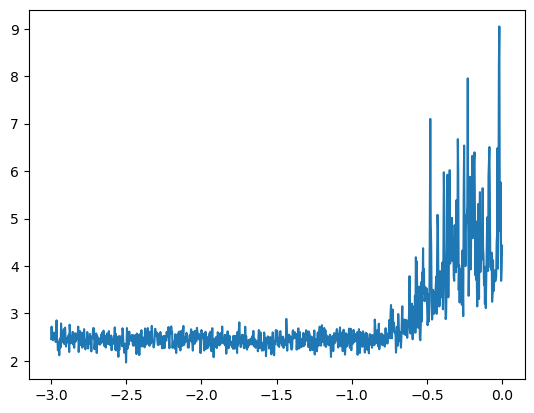

In [ ]:
plt.plot(lre , step_i)

In [ ]:
# around the valley region is a good lr -> 10^-1 = 0.1 was p good anyways , we choose it 

In [ ]:
# re -run it

# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.0004 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


# number of iterations
num_itr = 6500


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.1

for i in range(num_itr//2):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.1


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.004

Mini batch size :  73
Number of parameters are  3481
Iteration 0 : loss = 5.295319080352783
Iteration 50 : loss = 2.9174914360046387
Iteration 100 : loss = 2.8784730434417725
Iteration 150 : loss = 2.449430227279663
Iteration 200 : loss = 2.5590627193450928
Iteration 250 : loss = 2.7324352264404297
Iteration 300 : loss = 2.7387192249298096
Iteration 350 : loss = 2.673959493637085
Iteration 400 : loss = 2.738643169403076
Iteration 450 : loss = 2.585407257080078
Iteration 500 : loss = 2.6656742095947266
Iteration 1000 : loss = 2.687943696975708
Iteration 2000 : loss = 2.4571285247802734
Iteration 3000 : loss = 2.329030990600586
Iteration 4000 : loss = 2.275143623352051
Iteration 5000 : loss = 2.3750998973846436
Iteration 6000 : loss = 2.245107650756836
Iteration 0 : loss = 2.626063346862793
Iteration 50 : loss = 2.4208028316497803
Iteration 100 : loss = 2.6535096168518066
Iteration 150 : loss = 2.571354389190674
Iteration 200 : loss = 2.4837896823883057
Iteration 250 : loss = 2.438602447

In [ ]:
# we continue running it till we get stagnated then we do a learning rate decay

In [ ]:
#  now we test on dev split
ix = torch.randint(0, len(Xdev), (batch_size,))
X = Xdev[ix]
Y = Ydev[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

tensor(2.2204, grad_fn=<NllLossBackward0>)


In [ ]:
# dev has the same as training => we are prolly underfitting , which is good , so we should increase params and imrpve loss

In [ ]:
# re -run it

# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 221
batch_size = int(0.00035 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.randn((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.randn(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.randn(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True)   # 100 x 27
W2.data *= 0.1
b2 = torch.zeros(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


# number of iterations
num_itr = 17500


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    if 0 <= i < 7000:
        lr = 0.1
    elif 7000 <= i <12000:
        lr = 0.06
    elif 12000<= i < 16000:
        lr = 0.02
    else:
        lr = 0.009

    for p in params:
        p.data -= p.grad * lr

Mini batch size :  63
Number of parameters are  7595
Iteration 0 : loss = 4.164789199829102
Iteration 50 : loss = 2.8596112728118896
Iteration 100 : loss = 2.772709846496582
Iteration 150 : loss = 2.6900949478149414
Iteration 200 : loss = 2.6396849155426025
Iteration 250 : loss = 2.8479440212249756
Iteration 300 : loss = 2.7749485969543457
Iteration 350 : loss = 2.475573778152466
Iteration 400 : loss = 2.4661405086517334
Iteration 450 : loss = 2.5738773345947266
Iteration 500 : loss = 2.52573823928833
Iteration 1000 : loss = 2.6915576457977295
Iteration 2000 : loss = 2.2942898273468018
Iteration 3000 : loss = 2.49971866607666
Iteration 4000 : loss = 2.3787455558776855
Iteration 5000 : loss = 2.4979090690612793
Iteration 6000 : loss = 2.4624364376068115
Iteration 7000 : loss = 2.2813005447387695
Iteration 8000 : loss = 2.760359764099121
Iteration 9000 : loss = 2.14269757270813
Iteration 10000 : loss = 2.310370683670044
Iteration 11000 : loss = 2.1161129474639893
Iteration 12000 : loss =

In [ ]:
#  now we test on dev split
ix = torch.randint(0, len(Xdev), (batch_size,))
X = Xdev[ix]
Y = Ydev[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

tensor(2.0818, grad_fn=<NllLossBackward0>)


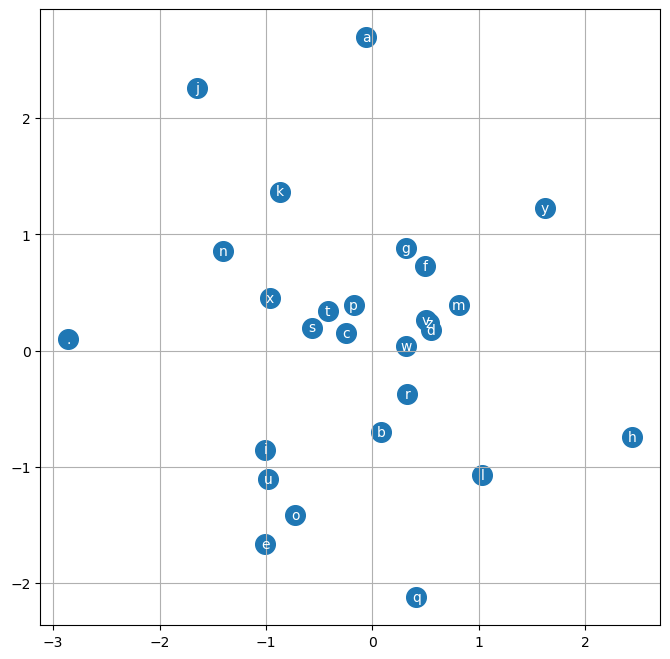

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# only for 2 dim  vectors 
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
#  now we test on test split
ix = torch.randint(0, len(Xtst), (batch_size,))
X = Xtst[ix]
Y = Ytst[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

NameError: name 'ffffff' is not defined

In [ ]:
# let's sample

for _ in range(10):
    context = [0]*block_size
    outs = []
    while True:
        emb = C[torch.tensor(context)]
        hidden = torch.tanh(emb.view(1 , block_size*emb_size) @ W1 + b1)
        logits = hidden @ W2 + b2
        probs = F.softmax(logits, dim=1)
        next = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [next]
        outs += [itos[next]]
        if next == 0:
            break

    print("".join(outs))

   

cavayzia.
sajanzekdeteni.
hemitia.
adela.
benn.
itthespy.
miri.
stary.
jaylyn.
shana.
